In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split

In [2]:
def color_grayscale_arr(arr, color='white'):
    """Converts grayscale image to either red or green"""
    assert arr.ndim == 2
    dtype = arr.dtype
    h, w = arr.shape
    arr = np.reshape(arr, [h, w, 1])
    if (color=='red'):
        arr = np.concatenate([arr,
                          np.zeros((h, w, 2), dtype=dtype)], axis=2)
    elif (color=='green'):
        arr = np.concatenate([np.zeros((h, w, 1), dtype=dtype),
                          arr,
                          np.zeros((h, w, 1), dtype=dtype)], axis=2)
    elif (color=='blue'):
        arr = np.concatenate([np.zeros((h, w, 1), dtype=dtype),
                          np.zeros((h, w, 1), dtype=dtype), 
                         arr], axis=2)
    elif (color=='white'):
        arr = np.concatenate([arr,
                          arr, 
                         arr], axis=2)
        
    return arr

In [3]:
np.random.seed(5)
tf.random.set_seed(5)

In [4]:
#We first load our data, and seek the distribution for its labels
train = pd.read_csv("./mnist/train.csv")
test = pd.read_csv("./mnist/test.csv")

#Create our labels array
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

In [5]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_train = X_train / 255.0
X_train = X_train.values.reshape(-1,28,28,1)

In [7]:
X_train.shape
X_train_green = np.empty(shape=(42000,28,28,3))
X_train_red = np.empty(shape=(42000,28,28,3))
X_train_blue = np.empty(shape=(42000,28,28,3))
X_train_white = np.empty(shape=(42000,28,28,3))
for i in range(len(X_train)):
    X_train_green[i] = color_grayscale_arr(X_train[i,:,:,0],'green')
    X_train_white[i] = color_grayscale_arr(X_train[i,:,:,0],'white')
    X_train_red[i] = color_grayscale_arr(X_train[i,:,:,0],'red')
    X_train_blue[i] = color_grayscale_arr(X_train[i,:,:,0],'blue')

In [8]:
# X_train = X_train_green

In [9]:
# for i in range(len(new_arr)):
#     new_arr[i] = color_grayscale_arr(X_train[i,:,:,0],'green')

In [10]:
# new_arr

In [11]:
# s1 = X_train[0,:,:,0]
# s1_test = color_grayscale_arr(s1,'green')
# plt.imshow(s1)

In [12]:
# s1 = new_arr[0,:,:,:]
# plt.imshow(s1)

In [13]:
# X_train = X_train / 255.0
# X_train = X_train.values.reshape(-1,28,28,3)
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes = 10)

X_train_green, X_test_green, Y_train_green, Y_test_green = train_test_split(X_train_green, Y_train, test_size = 0.90, random_state=42)
X_test_green, _, Y_test_green, _ = train_test_split(X_test_green, Y_test_green, test_size = 0.9, random_state=42)

X_train_red, X_test_red, Y_train_red, Y_test_red = train_test_split(X_train_red, Y_train, test_size = 0.90, random_state=42)
X_test_red, _, Y_test_red, _ = train_test_split(X_test_red, Y_test_red, test_size = 0.9, random_state=42)

X_train_blue, X_test_blue, Y_train_blue, Y_test_blue = train_test_split(X_train_blue, Y_train, test_size = 0.90, random_state=42)
X_test_blue, _, Y_test_blue, _ = train_test_split(X_test_blue, Y_test_blue, test_size = 0.9, random_state=42)

X_train_white, X_test_white, Y_train_white, Y_test_white = train_test_split(X_train_white, Y_train, test_size = 0.90, random_state=42)
X_test_white, _, Y_test_white, _ = train_test_split(X_test_white, Y_test_white, test_size = 0.9, random_state=42)


In [14]:
# X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.90, random_state=42)
# X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size = 0.9, random_state=42)

In [15]:
print(X_train_green.shape)
print(X_test_green.shape)
# print(X_val.shape)

(4200, 28, 28, 3)
(3780, 28, 28, 3)


In [16]:
# sample_number = 10
# X_train[sample_number, :, :, 0]
# plt.imshow(X_train[sample_number, :, :, :])
# print("True label: {}".format(np.argmax(Y_train[sample_number], axis=-1)))

In [17]:
X_train_green.shape[1:]

(28, 28, 3)

In [18]:
# test = color_grayscale_arr(X_train[sample_number, :, :, 0],'red')
# old_test = X_train[sample_number, :, :, ]
# plt.imshow(test)

# print(test.shape)

In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,3)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [21]:
optimizer = tf.keras.optimizers.Adam(lr=0.01)
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'], optimizer=optimizer)

In [22]:
history = model.fit(X_train_green, Y_train_green, epochs=10, validation_split=0.1)

Epoch 1/10
119/119 [==============================] - 8s 65ms/step - loss: 1.5468 - accuracy: 0.4868 - val_loss: 0.1420 - val_accuracy: 0.9643
Epoch 2/10
119/119 [==============================] - 7s 56ms/step - loss: 0.3812 - accuracy: 0.8842 - val_loss: 0.1707 - val_accuracy: 0.9429
Epoch 3/10
119/119 [==============================] - 7s 59ms/step - loss: 0.2613 - accuracy: 0.9224 - val_loss: 0.0984 - val_accuracy: 0.9690
Epoch 4/10
119/119 [==============================] - 7s 62ms/step - loss: 0.2982 - accuracy: 0.9027 - val_loss: 0.1057 - val_accuracy: 0.9667
Epoch 5/10
119/119 [==============================] - 7s 61ms/step - loss: 0.2292 - accuracy: 0.9302 - val_loss: 0.0858 - val_accuracy: 0.9643
Epoch 6/10
119/119 [==============================] - 7s 61ms/step - loss: 0.1802 - accuracy: 0.9433 - val_loss: 0.1028 - val_accuracy: 0.9690
Epoch 7/10
119/119 [==============================] - 7s 58ms/step - loss: 0.1841 - accuracy: 0.9384 - val_loss: 0.0709 - val_accuracy: 0.9857

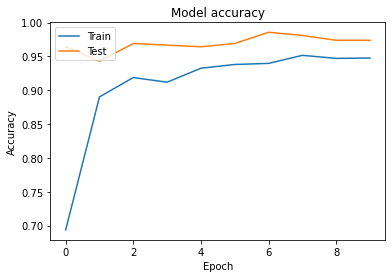

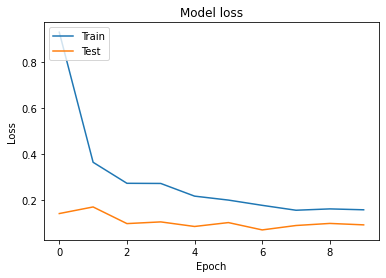

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
evaluation = model.evaluate(X_test_green, Y_test_green, verbose=1)
print(evaluation)

119/119 [==============================] - 1s 8ms/step - loss: 0.1590 - accuracy: 0.9606
[0.1590144783258438, 0.9605820178985596]


In [25]:
# Prediction for 1 image
sample_nb = 2
output = model(X_test_green[sample_nb:sample_nb+1, :, :, :])

Predicted label: 9


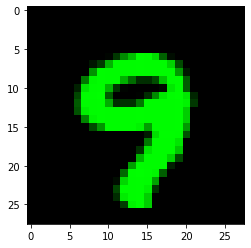

In [26]:
plt.imshow(X_test_green[sample_nb, :, :, :])
print("Predicted label: {}".format(np.argmax(output[0]), axis=-1))

In [27]:
for l in model.layers:
    print(l)

In [28]:
from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers[:3]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [29]:
# This func will compute layerwise average activations and the maximum of these means
def compute_avg_activation(activations,normalize=False):
    nb_layers = len(activations)
    layers_means = []
    lambdas = []
    for l in range(nb_layers):
        layer_output = activations[l][0]
        layer_mean_of_activs = [] # Stores average activations per layer
        for i in range (layer_output.shape[2]): # loop over each filter (3rd dimention) 
            filter_mean_activ = layer_output[:,:,i].mean() # Get the mean (A hat, from the paper)
            layer_mean_of_activs.append(filter_mean_activ)
        layer_max_activ = max(layer_mean_of_activs) # Get max (This is lambda of the layer)
        lambdas.append(layer_max_activ)
        if(normalize):
            layer_mean_of_activs = [x/layer_max_activ for x in layer_mean_of_activs] # Normalize
        layers_means.append(layer_mean_of_activs) # This is lambda prime of layer
    return layers_means, lambdas

In [30]:
from tqdm import tqdm

In [31]:
# Dataset should be for one target ethnicity 
def compute_lambdas(test_samples):
    lambdas = []
    for i in tqdm(range(len(test_samples))):
        image = test_samples[i]
        image = np.reshape(image,[1,28,28,3])
        all_outputs = activation_model.predict(image)
        means,layers_lambdas = compute_avg_activation(all_outputs,True)
        lambdas.append(layers_lambdas)
    lambdas = np.array(lambdas)
    lambdas_max = np.max(lambdas,0) # store the max per layer
    lambdas_min = np.min(lambdas,0) # store the min per layer
    return lambdas_max,lambdas_min

In [32]:
lambdas_max_blue, lambdas_min_blue = compute_lambdas(X_test_blue)

100%|██████████| 3780/3780 [02:51<00:00, 22.07it/s]


In [33]:
lambdas_max_green, lambdas_min_green = compute_lambdas(X_test_green)

100%|██████████| 3780/3780 [02:49<00:00, 22.28it/s]


In [34]:
lambdas_max_red, lambdas_min_red = compute_lambdas(X_test_red)

100%|██████████| 3780/3780 [02:50<00:00, 22.11it/s]


In [35]:
lambdas_max_white, lambdas_min_white = compute_lambdas(X_test_white)

100%|██████████| 3780/3780 [02:49<00:00, 22.31it/s]


In [36]:
layers = [x for x in range(0,3)]

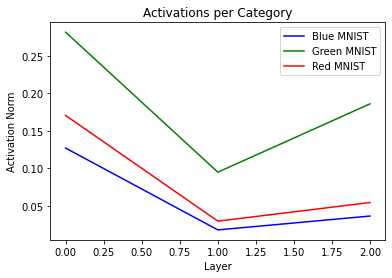

In [37]:
plt.plot(layers, lambdas_max_blue,'blue')
plt.plot(layers, lambdas_max_green,'green')
plt.plot(layers, lambdas_max_red,'red')
# plt.plot(layers, lambdas_max_white,'black')
plt.legend(['Blue MNIST','Green MNIST','Red MNIST'])
plt.title('Activations per Category')
plt.xlabel('Layer')
plt.ylabel('Activation Norm')
plt.show()